In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = sns.load_dataset("titanic")
df.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
# check the missing values
print(df.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [33]:
#  Select numeric columns
df.select_dtypes(include=[np.number])

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [35]:
#  Fill missing values with mean
df["fare"]=df["fare"].fillna(df["fare"].mean())
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [36]:
#  Confirm missing values are handled
print("\nMissing Values After Handling:\n", df.isnull().sum())


Missing Values After Handling:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [46]:
# Implement and compare the outcomes of any two methods of outlier detection.
# Method 1: Interquartile Range (IQR)
# Compute Q1, Q3, and IQR
Q1 = df["fare"].quantile(0.25)
Q3 = df["fare"].quantile(0.75)
df_std = df[(df["fare"] >= Q1) & (df["fare"] <= Q3)].dropna()
print("\nOriginal Shape:", df.shape)
print("After Removing Outliers  (Standard Deviation Method):", df_std.shape)


Original Shape: (891, 15)
After Removing Outliers  (Standard Deviation Method): (50, 15)


In [49]:
# Method 2: Z-Score Method
# Compute Z-score
z_scores = np.abs(stats.zscore(df["fare"]))

# Remove outliers where Z-score > 3
df_zscore = df[(z_scores < 3)]
print("\nDtata After removing outeliers using the z-score:\n", df_zscore.shape)



Dtata After removing outeliers using the z-score:
 (871, 15)


In [50]:
print("\nOriginal Dataset Size:", df.shape)
print("After IQR Method:", df_std.shape)
print("After Z-Score Method:", df_zscore.shape)


Original Dataset Size: (891, 15)
After IQR Method: (50, 15)
After Z-Score Method: (871, 15)


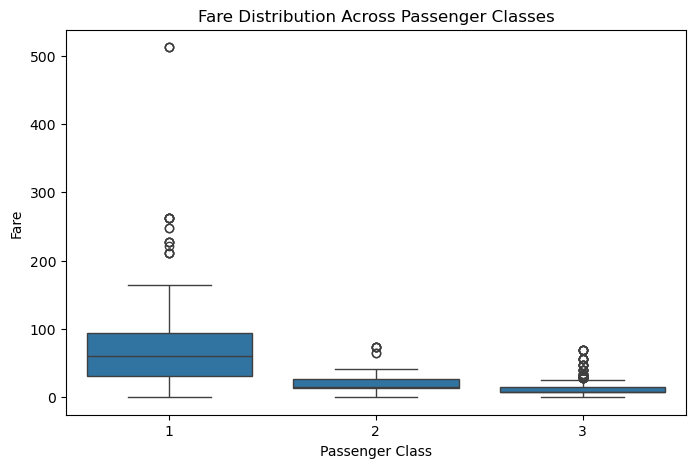

In [53]:
# Demonstrate any two data visualization techniques supported by Seaborn
# 1.Box Plot (Detecting Outliers & Distribution)

# # Selecting a numeric column for visualization
plt.figure(figsize=(8, 5))
# Box Plot
sns.boxplot(data=df, x="pclass", y="fare")
plt.title("Fare Distribution Across Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")

plt.show()

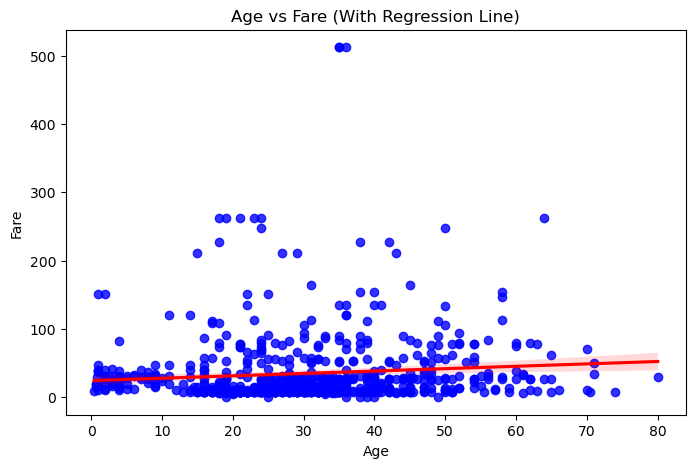

In [60]:

# Scatter Plot with Regression Line (Relationship Between Two Variables)
plt.figure(figsize=(8, 5))
# Scatter Plot with Regression Line
sns.regplot(data=df, x="age", y="fare", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Age vs Fare (With Regression Line)")
plt.xlabel("Age")
plt.ylabel("Fare")

plt.show()